# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** [Benny Alaster]
- **Email:** [mc333d5y1629@student.devacademy.id]
- **ID Dicoding:** [bennyalaster]

## Import Semua Packages/Library yang Digunakan

In [1]:
import os, shutil, random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Preparation

### Data Loading

In [9]:
from google.colab import files
uploaded = files.upload()  # Pilih file .zip kamu

import zipfile

with zipfile.ZipFile('Pistachio_Image_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('Pistachio_Image_Dataset')

Saving Pistachio_Image_Dataset.zip to Pistachio_Image_Dataset (1).zip


### Data Preprocessing

#### Split Dataset

In [10]:
def split_dataset(original_dir, output_dir, train_ratio=0.7, val_ratio=0.15):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    classes = [d for d in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir, d))]

    for cls in classes:
        cls_path = os.path.join(original_dir, cls)
        images = os.listdir(cls_path)
        random.shuffle(images)

        n_total = len(images)
        n_train = int(n_total * train_ratio)
        n_val = int(n_total * val_ratio)

        splits = {
            'train': images[:n_train],
            'validation': images[n_train:n_train+n_val],
            'test': images[n_train+n_val:]
        }

        for phase, img_list in splits.items():
            phase_dir = os.path.join(output_dir, phase, cls)
            os.makedirs(phase_dir, exist_ok=True)
            for img in img_list:
                src = os.path.join(cls_path, img)
                dst = os.path.join(phase_dir, img)
                shutil.copy2(src, dst)

split_dataset("Pistachio_Image_Dataset", "pistachio_dataset_split")

In [12]:
# Preprocessing & Augmentasi
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory("pistachio_dataset_split/train", target_size=(100, 100), batch_size=32, class_mode='categorical')
val_gen = datagen.flow_from_directory("pistachio_dataset_split/validation", target_size=(100, 100), batch_size=32, class_mode='categorical')
test_gen = datagen.flow_from_directory("pistachio_dataset_split/test", target_size=(100, 100), batch_size=32, class_mode='categorical')


Found 1503 images belonging to 2 classes.
Found 321 images belonging to 2 classes.
Found 324 images belonging to 2 classes.


## Modelling

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 kelas pada Pistachio
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,346 (16.61 MB)

 Trainable params: 4,353,346 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.7135 - loss: 0.6644 - val_accuracy: 0.8287 - val_loss: 0.3795
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8431 - loss: 0.3643 - val_accuracy: 0.8505 - val_loss: 0.3342
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8734 - loss: 0.2912 - val_accuracy: 0.8567 - val_loss: 0.3270
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8945 - loss: 0.2472 - val_accuracy: 0.8816 - val_loss: 0.3068
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8958 - loss: 0.2459 - val_accuracy: 0.8816 - val_loss: 0.2913
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9182 - loss: 0.1983 - val_accuracy: 0.8536 - val_loss: 0.3457
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9080 - loss: 0.2184 - val_accuracy: 0.8879 - val_loss: 0.3083
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9538 - loss: 0.1351 - val_accuracy: 0.8847 - val_loss: 

## Evaluasi dan Visualisasi

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8928 - loss: 0.2720
Akurasi Training     : 95.74%
Akurasi Validation   : 89.41%
Akurasi Testing      : 88.89%


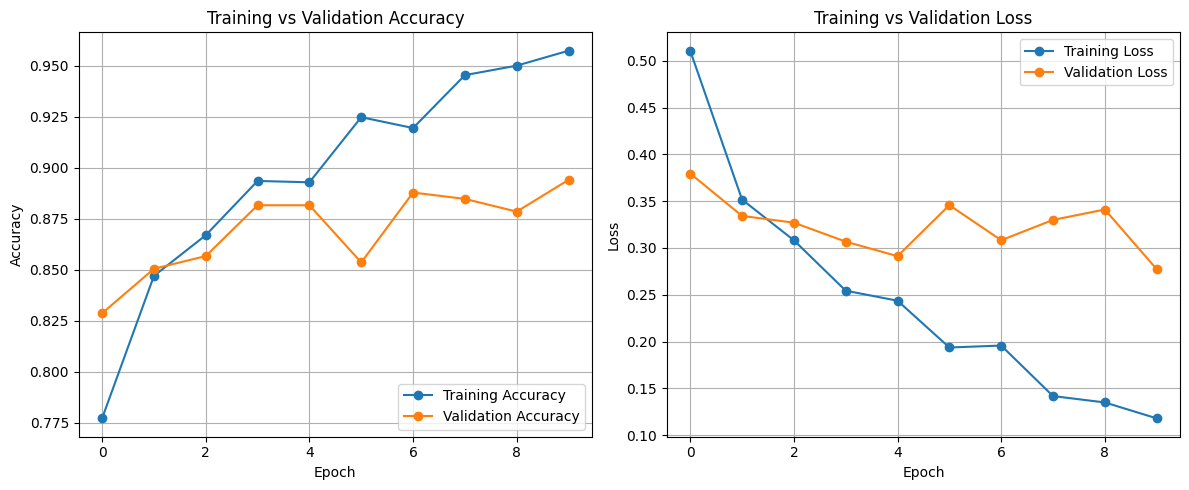

In [19]:
# Evaluasi akurasi
train_acc = history.history['accuracy'][-1]

val_acc = history.history['val_accuracy'][-1]

loss, test_acc = model.evaluate(test_gen)

print(f"Akurasi Training     : {train_acc*100:.2f}%")
print(f"Akurasi Validation   : {val_acc*100:.2f}%")
print(f"Akurasi Testing      : {test_acc*100:.2f}%")

#Visualisasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## Konversi Model

In [21]:
# SavedModel
model.export('model_saved')

# TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model('model_saved')
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# TFJS
!pip install tensorflowjs
!mkdir tfjs_model
!tensorflowjs_converter --input_format=tf_saved_model model_saved tfjs_model

Saved artifact at 'model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137201350482768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350484688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350486992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350481424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350486608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350488720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350488528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137201350489296: TensorSpec(shape=(), dtype=tf.resource, name=None)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
  Att

## Inference (Optional)